In [67]:
import pandas as pd
import numpy as np

In [68]:
test = pd.read_csv("../Final Dataset/Test.csv",index_col=0)
test

,Depth,Height,Width,Weight,Clarity,Cut,Polish,Symmetry,Fluorescence,Colour,Shape,Price
0,3.98,4.00,2.42,0.23,80,40,40,40,10,14,90,905.47
1,3.90,3.92,2.43,0.22,80,40,40,40,10,1,90,915.02
2,6.16,5.03,3.45,1.01,40,40,40,30,10,6,40,1640.54
3,4.90,4.95,3.20,0.50,40,30,40,30,10,1,90,1968.17
4,3.95,3.96,2.40,0.23,70,40,40,40,10,1,90,909.74
...,...,...,...,...,...,...,...,...,...,...,...,...
2443,4.06,4.02,2.86,0.40,60,40,30,30,10,12,80,1347.34
2444,6.23,4.11,2.80,0.71,40,40,40,40,20,13,30,897.22
2445,5.30,5.33,3.34,0.58,60,40,40,40,20,5,90,2080.80
2446,5.02,4.23,2.88,0.52,50,40,40,30,10,13,60,869.06


In [69]:
X = test.drop("Price",axis=1)
y = test.Price

In [70]:
X.columns

Index(['Depth', 'Height', 'Width', 'Weight', 'Clarity', 'Cut', 'Polish',
       'Symmetry', 'Fluorescence', 'Colour', 'Shape'],
      dtype='object')

In [71]:
import joblib as jb

In [74]:
# Loading the Scalers
sc_x = jb.load("../Scalers/ScalerX.pkl")
sc_y = jb.load("../Scalers/ScalerY.pkl")
model = jb.load("../Model/GBRModel.pkl")
    

In [76]:
x_tc = sc_x.transform(X)
y_tc = sc_y.transform(y.values.reshape(-1,1)).reshape(-1,)    


In [77]:
x_tc

array([[0.02183651, 0.07795276, 0.06053812, ..., 0.        , 0.325     ,
        0.5       ],
       [0.01735722, 0.07165354, 0.06165919, ..., 0.        , 0.        ,
        0.5       ],
       [0.14389698, 0.15905512, 0.17600897, ..., 0.        , 0.125     ,
        0.1875    ],
       ...,
       [0.09574468, 0.18267717, 0.16367713, ..., 0.08333333, 0.1       ,
        0.5       ],
       [0.08006719, 0.09606299, 0.11210762, ..., 0.        , 0.3       ,
        0.3125    ],
       [0.20940649, 0.19370079, 0.16816143, ..., 0.08333333, 0.3       ,
        0.375     ]])

In [78]:
y1=model.predict(x_tc)

In [79]:
y1

array([0.00255793, 0.002788  , 0.00976121, ..., 0.01076697, 0.0024494 ,
       0.01049702])

In [80]:
y_tc

array([0.00259806, 0.00266119, 0.00745737, ..., 0.01036779, 0.00235737,
       0.0114253 ])

In [81]:
# Calculate accuracy = 100 - mean(mape)
ma =abs(y1 - y_tc)
mape = 100 * (ma/y_tc)

mape

array([ 1.54456354,  4.7650539 , 30.89341561, ...,  3.8502478 ,
        3.90406651,  8.12472977])

In [82]:
mape.mean()

13.370668997432109

In [83]:
accuracy = 100 - mape.mean()
round(accuracy,2)

86.63

In [84]:
def accuracy(y,y_pd):
    ma= abs(y_pd-y)
    mape= 100* ma/y # calc : Percentage of false or errors
    accu= 100-mape.mean()
    return round(accu,2)

In [85]:
df_train = pd.read_csv("../Final Dataset/Train.csv",index_col=0)
x,y = df_train.drop("Price",axis=1),df_train.Price

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [87]:
x_tr_tf = sc_x.transform(x_train)
y_tr_tf = sc_y.transform(y_train.values.reshape(-1,1)).reshape(-1,) 
x_ts_tf = sc_x.transform(x_test)
y_ts_tf = sc_y.transform(y_test.values.reshape(-1,1)).reshape(-1,) 

In [88]:
y_pd_tr = model.predict(x_tr_tf)  # Prediction of Training
y_pd_ts=model.predict(x_ts_tf)   # Prediction of Testing

In [89]:
# rescale to normal
act_pr_tr= sc_y.inverse_transform(y_tr_tf.reshape(-1,1)).reshape(-1,)
pd_pr_tr=sc_y.inverse_transform(y_pd_tr.reshape(-1,1)).reshape(-1,)

act_pr_ts= sc_y.inverse_transform(y_ts_tf.reshape(-1,1)).reshape(-1,)
pd_pr_ts=sc_y.inverse_transform(y_pd_ts.reshape(-1,1)).reshape(-1,)



In [91]:
accuracy(act_pr_tr,pd_pr_tr)  # 98% approx training 

98.22

In [93]:
accuracy(act_pr_ts,pd_pr_ts)  # 92.1% approx training 

92.1

In [94]:
# cross validate
y_pd_cv=model.predict(x_tc)

In [95]:
# Rescale
act_cv= sc_y.inverse_transform(y_tc.reshape(-1,1)).reshape(-1,)
pd_cv=sc_y.inverse_transform(y_pd_cv.reshape(-1,1)).reshape(-1,)


In [96]:
accuracy(act_cv,pd_cv) # Cross Val accuracy : 91%

91.7

In [97]:
sc_y.inverse_transform(y1.reshape(1,-1))

array([[ 899.39971084,  934.20220099, 1989.0424428 , ..., 2141.18497631,
         882.98190118, 2100.34948299]])

In [98]:
model = jb.load("../Model/GBRModel.pkl")
model

GradientBoostingRegressor(alpha=0.89, criterion='mae',
                          learning_rate=0.2527894736842105, loss='huber',
                          max_depth=1000, max_features='log2',
                          min_samples_leaf=6, min_samples_split=5,
                          n_estimators=366, n_iter_no_change=80)

In [99]:
model.criterion

'mae'

In [104]:
model.feature_importances_

array([0.13386912, 0.26449559, 0.19607706, 0.21043714, 0.04164001,
       0.00552723, 0.00550189, 0.00849838, 0.00985205, 0.06405772,
       0.06004381])

Text(0.5, 1.0, 'Feature Importance By GBR Model')

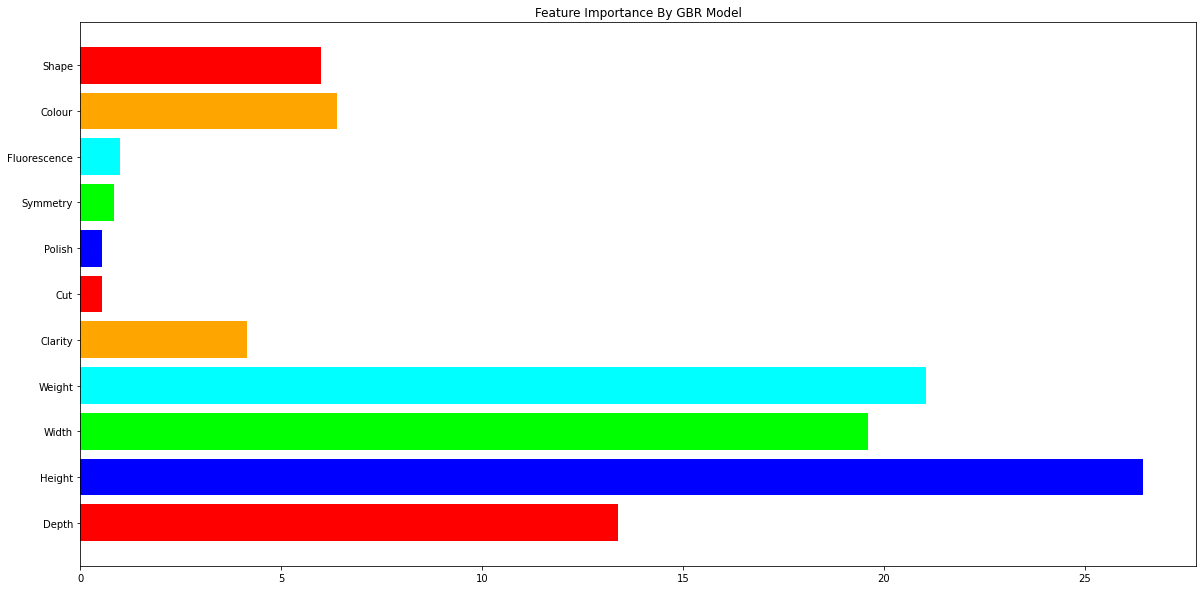

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.barh(X.columns, model.feature_importances_*100,color=['r','b','lime','aqua','orange'])
plt.title("Feature Importance By GBR Model")

In [103]:
from sklearn.metrics import mean_squared_error as mse

In [122]:
y_pd=model.predict(x_tc) # Cross val dataset
print("Cost : ", mse(y_tc,y_pd))

Cost :  0.00010512476236828537


# Plot Tradeoff

In [123]:
Price_pd = sc_y.inverse_transform(y_pd.reshape(-1,1))
ActualPrice = sc_y.inverse_transform(y_tc.reshape(-1,1))

In [124]:
Price_pd

array([[ 899.39971084],
       [ 934.20220099],
       [1989.0424428 ],
       ...,
       [2141.18497631],
       [ 882.98190118],
       [2100.34948299]])

In [126]:
ActualPrice

array([[ 905.47],
       [ 915.02],
       [1640.54],
       ...,
       [2080.8 ],
       [ 869.06],
       [2240.77]])

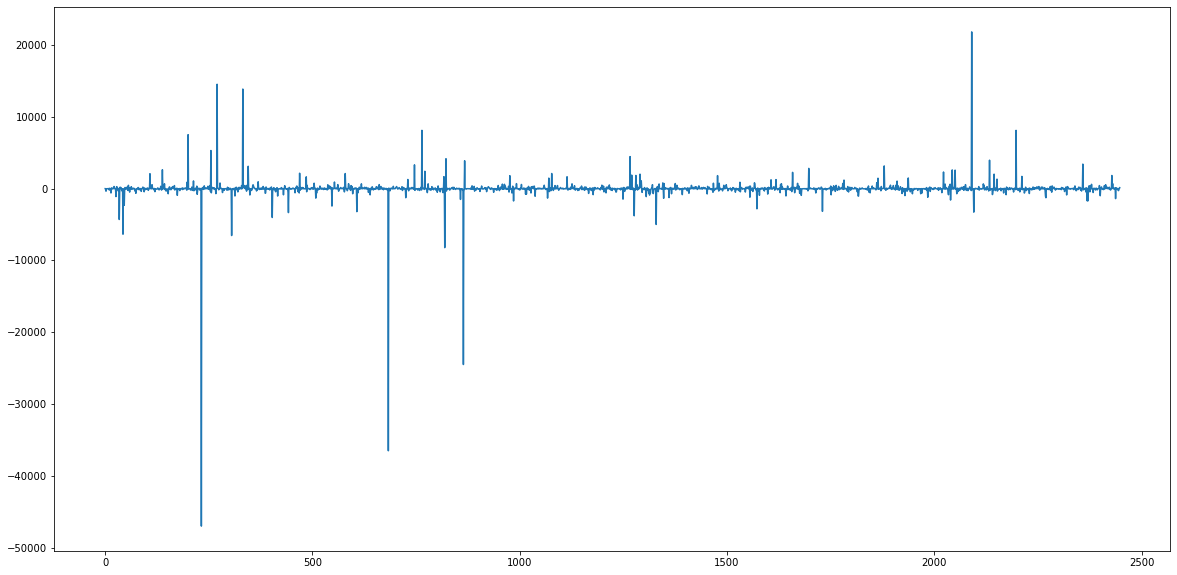

In [131]:
# Residual vary
plt.figure(figsize=(20,10))
plt.plot(ActualPrice-Price_pd)

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
pds= Price_pd.reshape(-1,)
act = ActualPrice.reshape(-1,)

In [134]:
pds = pds.round()
act = act.round()

In [135]:
pds =sorted(pds)
act=sorted(act)

In [136]:
pds

[565.0,
 620.0,
 644.0,
 644.0,
 670.0,
 693.0,
 694.0,
 726.0,
 736.0,
 743.0,
 745.0,
 745.0,
 750.0,
 751.0,
 762.0,
 766.0,
 771.0,
 773.0,
 783.0,
 784.0,
 785.0,
 786.0,
 790.0,
 791.0,
 794.0,
 795.0,
 796.0,
 796.0,
 796.0,
 796.0,
 797.0,
 797.0,
 797.0,
 799.0,
 799.0,
 802.0,
 803.0,
 803.0,
 806.0,
 807.0,
 807.0,
 808.0,
 808.0,
 809.0,
 809.0,
 812.0,
 812.0,
 813.0,
 813.0,
 816.0,
 816.0,
 818.0,
 819.0,
 828.0,
 828.0,
 829.0,
 830.0,
 830.0,
 830.0,
 830.0,
 832.0,
 832.0,
 833.0,
 833.0,
 834.0,
 834.0,
 835.0,
 835.0,
 835.0,
 835.0,
 835.0,
 836.0,
 837.0,
 837.0,
 837.0,
 838.0,
 839.0,
 840.0,
 840.0,
 841.0,
 841.0,
 841.0,
 841.0,
 842.0,
 842.0,
 842.0,
 842.0,
 843.0,
 843.0,
 844.0,
 844.0,
 845.0,
 845.0,
 846.0,
 846.0,
 848.0,
 848.0,
 848.0,
 849.0,
 849.0,
 849.0,
 849.0,
 850.0,
 852.0,
 852.0,
 853.0,
 853.0,
 853.0,
 853.0,
 854.0,
 854.0,
 854.0,
 854.0,
 854.0,
 854.0,
 855.0,
 855.0,
 855.0,
 856.0,
 857.0,
 857.0,
 857.0,
 857.0,
 858.0,
 859.0,


In [137]:
act

[572.0,
 583.0,
 623.0,
 642.0,
 650.0,
 667.0,
 673.0,
 677.0,
 679.0,
 683.0,
 696.0,
 698.0,
 724.0,
 725.0,
 726.0,
 731.0,
 732.0,
 733.0,
 734.0,
 736.0,
 740.0,
 741.0,
 744.0,
 744.0,
 747.0,
 752.0,
 753.0,
 754.0,
 758.0,
 758.0,
 759.0,
 761.0,
 762.0,
 763.0,
 766.0,
 767.0,
 769.0,
 770.0,
 770.0,
 771.0,
 771.0,
 775.0,
 777.0,
 777.0,
 778.0,
 780.0,
 781.0,
 782.0,
 782.0,
 784.0,
 784.0,
 784.0,
 786.0,
 788.0,
 789.0,
 789.0,
 790.0,
 790.0,
 790.0,
 794.0,
 794.0,
 795.0,
 795.0,
 795.0,
 796.0,
 796.0,
 798.0,
 798.0,
 798.0,
 799.0,
 799.0,
 800.0,
 801.0,
 802.0,
 803.0,
 805.0,
 808.0,
 808.0,
 809.0,
 809.0,
 809.0,
 810.0,
 810.0,
 810.0,
 811.0,
 815.0,
 819.0,
 819.0,
 819.0,
 820.0,
 822.0,
 822.0,
 823.0,
 823.0,
 824.0,
 826.0,
 827.0,
 829.0,
 829.0,
 829.0,
 830.0,
 830.0,
 831.0,
 831.0,
 832.0,
 833.0,
 833.0,
 833.0,
 834.0,
 834.0,
 835.0,
 836.0,
 836.0,
 836.0,
 837.0,
 837.0,
 837.0,
 837.0,
 837.0,
 838.0,
 838.0,
 839.0,
 839.0,
 840.0,
 840.0,


In [138]:
x= range(0,len(act))

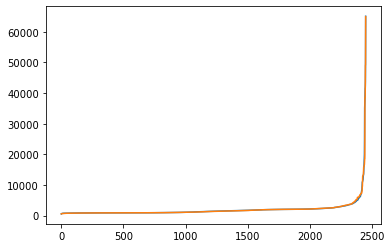

In [139]:
sns.lineplot(x,pds)
sns.lineplot(x,act)

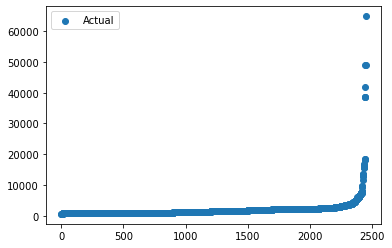

In [119]:
plt.scatter(x,act,label="Actual")
plt.legend()

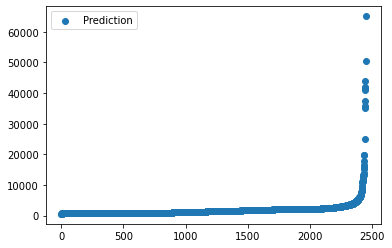

In [120]:
plt.scatter(x,pds,label="Prediction")
plt.legend()

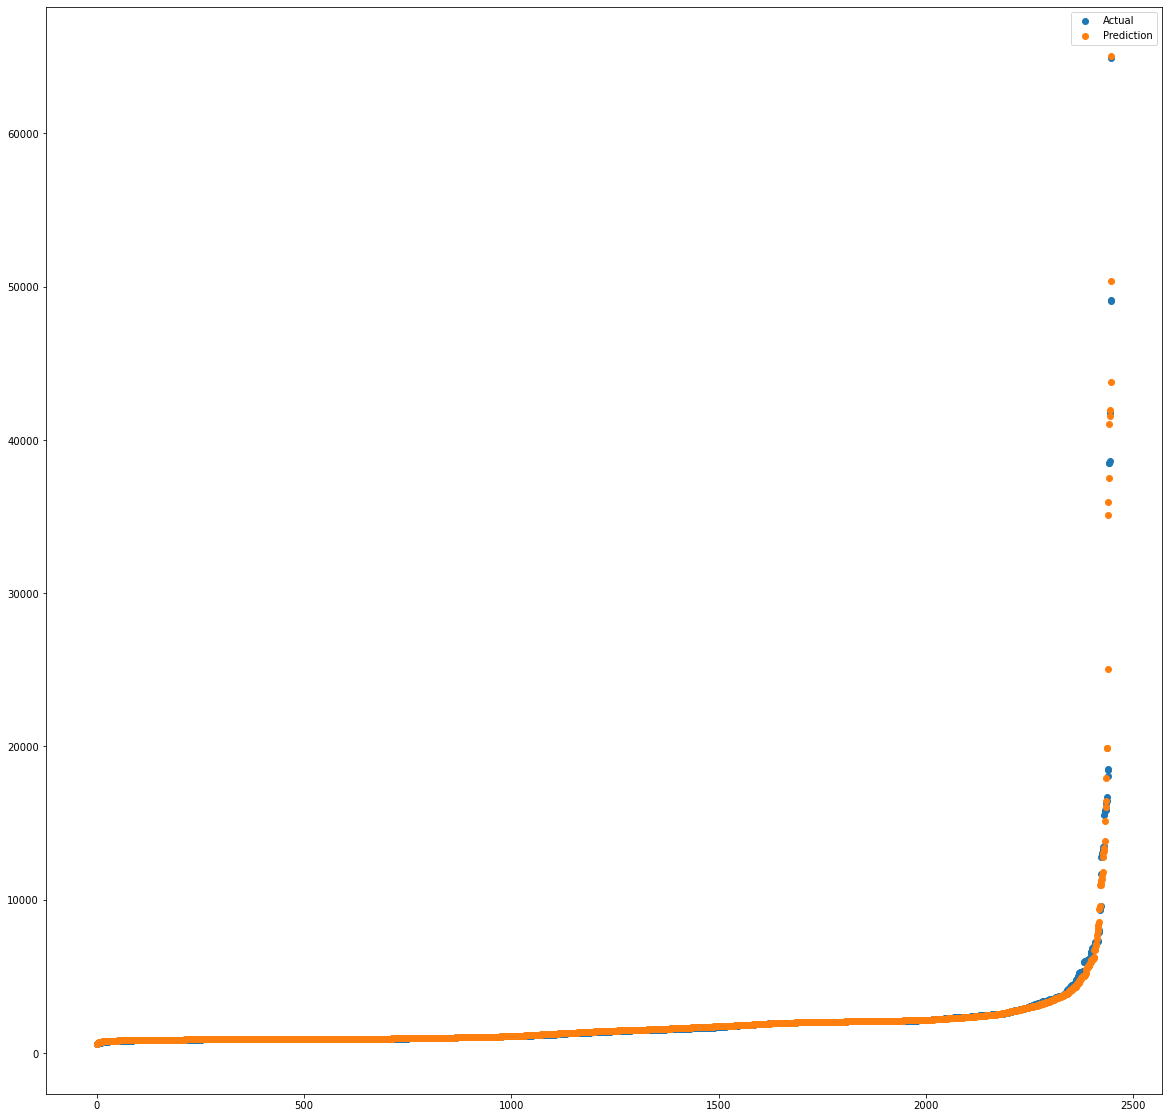

In [121]:
plt.figure(figsize=(20,20))
plt.scatter(x,act,label="Actual")
plt.scatter(x,pds,label="Prediction")
plt.legend()